# Budget Analysis

---

## Environment Setup

In [1]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline


In [2]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [17]:
# Set environment variables from the .env file
load_dotenv()

True

In [18]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SECRET")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")
print(PLAID_SECRET)

e11d420839dc7ea3bbeb4d8c17c245


---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [19]:
from plaid import Client
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, environment='sandbox')

In [20]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [21]:
# Create the public token
create_tkn_rspnse = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])
#access_token = response['access_token']
# Print the public token
print(create_tkn_rspnse)

{'public_token': 'public-sandbox-840e5f21-e9e6-4995-88ab-e956ae354644', 'request_id': 'nqk7R61kEUhd0dI'}


### 3. Exchange the public token for an access token

In [22]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_rspnse['public_token'])
# Print the access token
print(exchange_response)

{'access_token': 'access-sandbox-da126da1-f3d6-48f6-9e54-272b512a2be8', 'item_id': 'jQyMm7rB7BIQ8ljN75gVFGW49KL3MeC1qoXmw', 'request_id': 'KTvf6p06KDE0U69'}


In [23]:
# Store the access token in a Python variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [24]:
# Retrieve accounts
accounts_all = client.Accounts.get(access_token)
# Print accounts
print(json.dumps(accounts_all, indent=4, sort_keys=True))

{
    "accounts": [
        {
            "account_id": "eNAjxwelwlFN4gxAPy91SrX5N3wqKWFLm4kPV",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "Qbx1GZPwZwfB3M1JxdjNi3jxEoeDPJhpD5eBz",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [25]:
# Set the start and end date 90 days from today
# Retrieve the transactions for the last 90 days
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
transactions_response = client.Transactions.get(access_token, start_date, end_date)
# Print the transactions
print(json.dumps(transactions_response, indent=4, sort_keys=True))

{
    "accounts": [
        {
            "account_id": "eNAjxwelwlFN4gxAPy91SrX5N3wqKWFLm4kPV",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "Qbx1GZPwZwfB3M1JxdjNi3jxEoeDPJhpD5eBz",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

### 2. Print the categories for each transaction

In [26]:
# Create a for-loop to print the categories for each transaction
for transactions in transactions_response['transactions']:
    if transactions['category']:
        print(json.dumps(transactions['category'], indent=4, sort_keys=True))

[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Travel",
    "Taxi"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Shops",
    "Sporting Goods"
]
[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Taxi"
]
[
    "Transfer",
    "Debit"
]
[
    "Transfer",
    "Deposit"
]
[
    "Recreation",
    "Gyms and Fitness Centers"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Food and Drink",
    "Restaurants",
    "Coffee Shop"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Transfer",
    "Credit"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Travel",
    "Taxi"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Shops",
    "Sporting Goods"
]
[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Taxi"
]
[
 

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [27]:
transactions_response['transactions'],('date')

([{'account_id': 'MWreNPdvPviVmlyZr6aPUyapbxW8qmT91Jykm',
   'account_owner': None,
   'amount': 500,
   'authorized_date': None,
   'category': ['Travel', 'Airlines and Aviation Services'],
   'category_id': '22001000',
   'date': '2020-07-29',
   'iso_currency_code': 'USD',
   'location': {'address': None,
    'city': None,
    'country': None,
    'lat': None,
    'lon': None,
    'postal_code': None,
    'region': None,
    'store_number': None},
   'merchant_name': 'United Airlines',
   'name': 'United Airlines',
   'payment_channel': 'in store',
   'payment_meta': {'by_order_of': None,
    'payee': None,
    'payer': None,
    'payment_method': None,
    'payment_processor': None,
    'ppd_id': None,
    'reason': None,
    'reference_number': None},
   'pending': False,
   'pending_transaction_id': None,
   'transaction_code': None,
   'transaction_id': 'Pn3MZ7Nv7vt6GkBX3JPNHvPpBzy9BPF7WRW7X',
   'transaction_type': 'special',
   'unofficial_currency_code': None},
  {'account_id

In [ ]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
#trans_data = pd.DataFrame(transactions_response['transactions'])


#Populate the transactions DataFrame with the transactions data
#for date in transactions_response:
#    if transactions['date']:
#        trans_data.append('date')

#trans_data.sample(5)
# Display sample data from the DataFrame 

In [28]:
transaction_df = pd.DataFrame(columns=["date", "name", "amount", "category"])

transactions = transactions_response["transactions"]

for index, transaction in enumerate(transactions):
    transaction_df.loc[index]=[transaction["date"], transaction["name"], transaction["amount"], transaction["category"][0]]

transaction_df.head()

,date,name,amount,category
0,2020-07-29,United Airlines,500,Travel
1,2020-07-27,Uber 072515 SF**POOL**,6.33,Travel
2,2020-07-24,Tectra Inc,500,Food and Drink
3,2020-07-23,AUTOMATIC PAYMENT - THANK,2078.5,Payment
4,2020-07-23,KFC,500,Food and Drink


# 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [29]:
# Display data types
transaction_df.dtypes

date        object
name        object
amount      object
category    object
dtype: object

In [30]:
# Make any required data type transformation
transaction_df = transaction_df.set_index('date')
transaction_df.sample()

,name,amount,category
date,,,
2020-05-28,Uber 072515 SF**POOL**,6.33,Travel


In [40]:
# Set the date column as index
# Display sample data
transaction_df.sort_values(by='date',ascending=False)
len(transaction_df)

49

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [32]:
# Fetch de income data
income = client.Income.get(access_token)
# Print the income data
income

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'Le34qvTNilEEklD'}

In [33]:
# Determine the previous year's gross income and print the results
income['income']['last_year_income_before_tax']

7285

In [34]:
income['income']['income_streams'][0]['monthly_income']

500

In [35]:
# Determine the current monthly income and print the results
income['income']['projected_yearly_income']/12

507.0833333333333

In [36]:
# Determine the projected yearly income and print the results
income['income']['projected_yearly_income']

6085

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [43]:
# Compute the total expenses per category
category_expenses = transaction_df.groupby('category').sum()['amount']
# Display the expenses per catefory
category_expenses

category
Food and Drink     3317.19
Payment            6310.50
Recreation          235.50
Shops              1500.00
Transfer          20537.34
Travel              535.19
Name: amount, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0A2FEAB0>],
      dtype=object)

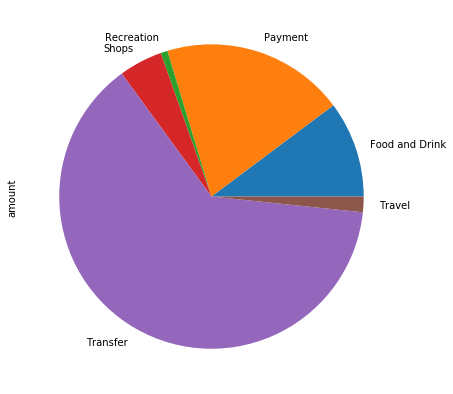

In [44]:
# Create a spending categories pie chart.
category_expenses.plot.pie(subplots=True, figsize=(7,7))

### Calculate the expenses per month

In [47]:
transaction_df.head()

,name,amount,category
date,,,
2020-07-29,United Airlines,500,Travel
2020-07-27,Uber 072515 SF**POOL**,6.33,Travel
2020-07-24,Tectra Inc,500,Food and Drink
2020-07-23,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2020-07-23,KFC,500,Food and Drink


In [49]:
transaction_df = transaction_df.reset_index()
transaction_df.head()

,date,name,amount,category
0,2020-07-29,United Airlines,500,Travel
1,2020-07-27,Uber 072515 SF**POOL**,6.33,Travel
2,2020-07-24,Tectra Inc,500,Food and Drink
3,2020-07-23,AUTOMATIC PAYMENT - THANK,2078.5,Payment
4,2020-07-23,KFC,500,Food and Drink


In [51]:
transaction_df['Month'] = pd.DatetimeIndex(transaction_df['date']).month
transaction_df.head()

,date,name,amount,category,Month
0,2020-07-29,United Airlines,500,Travel,7
1,2020-07-27,Uber 072515 SF**POOL**,6.33,Travel,7
2,2020-07-24,Tectra Inc,500,Food and Drink,7
3,2020-07-23,AUTOMATIC PAYMENT - THANK,2078.5,Payment,7
4,2020-07-23,KFC,500,Food and Drink,7


In [55]:
# Create a DataFrame with the total expenses
#b.groupby(pd.Grouper(freq='M'))
expenses_df = transaction_df.groupby('Month').sum()['amount']
# Display sample data
expenses_df

Month
4      500.00
5    10645.24
6    10645.24
7    10645.24
Name: amount, dtype: float64

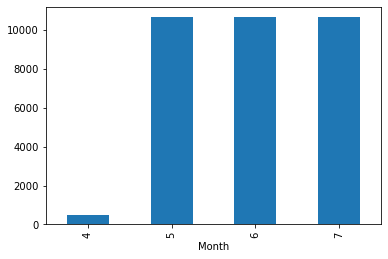

In [57]:
# Create a spending per month bar chart
expenses_df.plot.bar()